In [1]:
import glob
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import math
import string

# Loading train data - sort in the same order

In [3]:
# Load descriptions train data and images train
description_train = glob.glob("data/descriptions_train/*.txt")
description_train_sort = sorted(description_train)

all_text = list()
for item in description_train_sort:
    with open(item) as f:
        text = f.read()
        all_text.append(text)


In [4]:
images_train = glob.glob("data/images_train/*.jpg")
images_train_sort = sorted(images_train)

In [5]:
description_train_sort

['data/descriptions_train/0.txt',
 'data/descriptions_train/1.txt',
 'data/descriptions_train/10.txt',
 'data/descriptions_train/100.txt',
 'data/descriptions_train/1000.txt',
 'data/descriptions_train/1001.txt',
 'data/descriptions_train/1002.txt',
 'data/descriptions_train/1003.txt',
 'data/descriptions_train/1004.txt',
 'data/descriptions_train/1005.txt',
 'data/descriptions_train/1006.txt',
 'data/descriptions_train/1007.txt',
 'data/descriptions_train/1008.txt',
 'data/descriptions_train/1009.txt',
 'data/descriptions_train/101.txt',
 'data/descriptions_train/1010.txt',
 'data/descriptions_train/1011.txt',
 'data/descriptions_train/1012.txt',
 'data/descriptions_train/1013.txt',
 'data/descriptions_train/1014.txt',
 'data/descriptions_train/1015.txt',
 'data/descriptions_train/1016.txt',
 'data/descriptions_train/1017.txt',
 'data/descriptions_train/1018.txt',
 'data/descriptions_train/1019.txt',
 'data/descriptions_train/102.txt',
 'data/descriptions_train/1020.txt',
 'data/descr

In [6]:
images_train_sort

['data/images_train/0.jpg',
 'data/images_train/1.jpg',
 'data/images_train/10.jpg',
 'data/images_train/100.jpg',
 'data/images_train/1000.jpg',
 'data/images_train/1001.jpg',
 'data/images_train/1002.jpg',
 'data/images_train/1003.jpg',
 'data/images_train/1004.jpg',
 'data/images_train/1005.jpg',
 'data/images_train/1006.jpg',
 'data/images_train/1007.jpg',
 'data/images_train/1008.jpg',
 'data/images_train/1009.jpg',
 'data/images_train/101.jpg',
 'data/images_train/1010.jpg',
 'data/images_train/1011.jpg',
 'data/images_train/1012.jpg',
 'data/images_train/1013.jpg',
 'data/images_train/1014.jpg',
 'data/images_train/1015.jpg',
 'data/images_train/1016.jpg',
 'data/images_train/1017.jpg',
 'data/images_train/1018.jpg',
 'data/images_train/1019.jpg',
 'data/images_train/102.jpg',
 'data/images_train/1020.jpg',
 'data/images_train/1021.jpg',
 'data/images_train/1022.jpg',
 'data/images_train/1023.jpg',
 'data/images_train/1024.jpg',
 'data/images_train/1025.jpg',
 'data/images_train

In [7]:
for item in all_text:
    print item

The skateboarder is putting on a show using the picnic table as his stage.
A skateboarder pulling tricks on top of a picnic table.
A man riding on a skateboard on top of a table.
A skate boarder doing a trick on a picnic table.
A person is riding a skateboard on a picnic table with a crowd watching.

A bowl of soup that has some carrots, shrimp, and noodles in it.
The healthy food is in the bowl and ready to eat. 
Soup has carrots and shrimp in it as it sits next to chopsticks.
A tasty bowl of ramen is served for someone to enjoy. 
Bowl of Asian noodle soup, with shrimp and carrots.

A bunch of luggage laying on an area rug. 
Several pieces of luggage on a floor with an area rug.
The luggage is sitting on top of the persian rug.
a bunch of travel bags sit on a carpet floor 
Several pieces of luggage that are laying on the floor.

The browned cracked crust of a baked berry pie.
A brown crust of pie with strawberry filing. 
The top of a pie looks all crusty and good.
A close up of a cook

a picture of a bunch of train cars colored red.
A red train is on a track and the other track is empty.
A red train car traveling down train tracks.
A red train car is on the tracks between other cars.
A red train with 2 cars sitting on tracks.

Three items of luggage of color blue, black, and red

The person reaches for the red bag stacked next to the blue and black bags.
A person stands by a collection of luggage.
A person sits close to a group of stacked luggage. 
Three different colored duffel bags with travel tags

A person carries a surfboard in from the water.
A man surfer walking out of the water
The surf boarder is coming out of the water.
a surfer with a wet suit is carrying a white surfboard
A person walking out of the waves with a surfboard.

street lights on a city street with no one around
Traffic lights on a city street at dusk.
an intersection at night with street lights and signs 
A green light on an empty suburban road.
A green traffic light suspended over a street.



A stone clock tower juts out from the fog below.
a tall brick tower is in the haze
A tower with a window surrounded by a fog.
This is a view of a foggy day in the countryside.
A church steeple with a clock on the front of it

A sculpture of two women stting on a bench with their purses on the ground while people standing in a line behind them. 
A metal statue of two women sits on a bench in a city street.
A statue of two women with purses sitting on a bench. 
A statue of two people sitting on a bench.
A metal statue of two women sitting on a bench.

A batter swings hard at a low ball as the catcher reaches out his glove.
A baseball batter swinging his bat and poised to run.
A baseball player swinging a baseball bat during a game.
A man swinging at a baseball with an umpire behind him
a batter at home plate swinging his baseball bat

a building with a clock on the top of it 
a big building with a bridge coming out of it 
There is a clock in the top of the fancy structure.
there is a sma

A living room with a white couch and flat screen TV.
A view of a room in a house.
A living room with a couch, television, and fireplace.
A picture of a living room with a couch and television.
A living room with a couch, tv and fireplace.

a man and his baby are looking at some donuts
A father holding his baby in front of a box of donuts.
A man and a baby looking at donuts with high enthusiasm.
a man looking at assorted donuts as his baby looks into the camera 
A man holding an infant in front of an open box of assorted donuts. 

A person who is sitting on a bench with pigeons around them.
The old woman is feeding the birds in the street.
A courtyard, full of poles, pigeons, and garbage cans, also has benches on either side of it, one of which shows the back of a large person facing in the direction of the pigeons. 
An individual sitts at a city park while birds gather around.
A person sits on the sidewalk bench near a flock of birds.

A young man riding a skateboard up the side of a r


a group of pictures with baseball players in it
A man standing on a baseball field talking to a child on the pitchers mound.
Coach telling young pitcher what to do with the baseball
In side-by-side photos, a uniformed adult coach engages with a child on a baseball diamond's pitching mound and the child player stands alone in the next picture with the ball in hand at his chest and gloved hand at his side.
A child is talking to a man at a baseball game.

a carrot some celery and a knife on a plastic cutting board
A knife sits next to a carrot on a cutting board.
A carrot and celery are on a cutting board.
A cutting board and knife with a carrot
The celery and carrots are on a cutting board with a knife.

There is one slice of pizza left on the plate. 
A slice of pizza with pepperoni and pineapple on it.
A tasty looking slice of pizza with some toppings.
A slice of pizza that's sitting on a plate on the table. 
There is a slice of pizza with pepperoni and pineapple on it.

a person feedi

Two images of open suitecases full of toiletries. 
A briefcase sitting on top of a bed with lots of items in them.
an open luggage bag on the ground next to a back pack
Opened suitcase displaying many different items in plastic bags.
Luggage on the floor opened to show it's stuffed contents

A man holding skis and poles walking up stairs.
A man with skis climbing a staircase at night.
A man walking up some stairs while holding skis.
a man holding skis walking up some steps 
A man walking up snow covered stairs carrying skis.

A bathroom area with a  sink, cabinets and a tub.
A bath and sink in a small room.
A modern, white tiled bathroom with a skylight.
A bathroom with a sink, tub and lights.
A very white, modern bathroom looks cold and unwelcoming. 

A bus parked in front of a bus stop.
People waiting at a bus stop with a bus parked.
People are waiting under the roof at the bus stop.
A couple of men standing in front of a bus at a bus station.
A bus stop with sun shades and a parked 


A man riding skis down a snow covered ski slope.
A skier leaning near a flag in the snow.
a skier is seen bending down going down a hill
A person on some skis in the snow.
A person who is racing down a hill on snow skis.

A clcok mounted to the side of a wall on the outside of a building.
A city block with a building and a clock
Buildings with a clock and lampposts along a street.
A clock is attached to the side of a building.
A clock protrudes high up on the side of a building.

A white refrigerator freezer sitting on a  hard wood floor.
A refrigerator and waste basket next to a wall.
There is no image that is on display to describe.
A tall thin refrigerator and a trash can.
a large refridgerator sitting on a wooden floor next to a trash can

A white dog having its hair blown dry by a man.
a person holding a blow dryer up to a dog sitting before the person.
A man blow drying a dog in front of a curtain.
A dog being blown dry by a man.
A dog being blow dried by a groomer.

A large sto

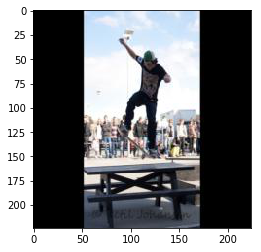

In [8]:
img=mpimg.imread(images_train_sort[0])
imgplot = plt.imshow(img)
plt.show()

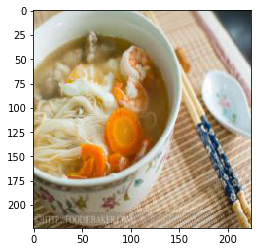

In [9]:
img=mpimg.imread(images_train_sort[1])
imgplot = plt.imshow(img)

In [10]:
#Load feautres
features_train = pd.read_csv('data/features_train/features_resnet1000_train.csv')
features_train.head()

images train  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  images_train/5373.jpg   -0.899450   -0.930470   -2.503365   -3.172499   
1   images_train/984.jpg   -1.346954   -3.119461   -0.765971   -1.382550   
2  images_train/7127.jpg   -3.445498   -1.524573   -1.001654   -3.668335   
3  images_train/9609.jpg    1.114650   -2.167102    0.097881   -1.336255   
4  images_train/5293.jpg    1.602650   -1.505817    3.029409    4.092412   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9      ...        \
0   -2.819133    0.992159   -3.698863    0.619991    0.956148      ...         
1   -1.104675   -3.656271   -4.815436   -0.556942   -1.402286      ...         
2   -1.805517   -1.633496   -7.127826   -1.147802   -1.055816      ...         
3    0.853483   -0.374885   -2.369090   -2.273191   -1.143788      ...         
4    1.711755    6.271253    4.173686   -2.177313    0.747789      ...         

   Unnamed: 991  Unnamed: 992  Unnamed: 993  Unnamed: 994  Unnamed: 995  \
0     -3.021916      2.214253     -1.382491      1.672911      1.014233   
1      0.011003     -3.968805     -2.694711     -4.196480     -2.880234   
2     -2.991777     -2.628053     -2.971074     -2.537039     -1.707429   
3     -1.248134     -0.633126     -1.723514     -2.638832      0.097149   
4     -1.285806     -2.266481     -3.898053      2.295787     -1.749552   

   Unnamed: 996  Unnamed: 997  Unnamed: 998  Unnamed: 999  Unnamed: 1000  
0      2.599949      2.773284     -2.066632      0.385754      -3.241320  
1     -1.210742     -1.605143     -4.859987     -0.837670      -0.967604  
2      1.013672      0.608460     -3.714998     -0.484735       0.138767  
3      4.647974      1.030138     -2.193836      1.044024       0.176043  
4      0.974188      1.258117     -1.975622     -1.278643      -1.941441  

[5 rows x 1001 columns]

In [11]:
feature_train_sort = features_train.sort_values(by = ['images train'])
feature_train_sort.head()

images train  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
6643     images_train/0.jpg   -4.552913   -3.339373    0.739805   -1.064960   
2273     images_train/1.jpg    1.055800    1.345920   -4.621484   -3.391327   
7719    images_train/10.jpg   -1.601292   -2.199482   -0.254420   -1.865104   
9839   images_train/100.jpg   -0.596288   -0.154158    2.084059    0.038803   
9966  images_train/1000.jpg   -1.329414   -2.590716   -0.110130   -0.800338   

      Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
6643   -0.385821   -1.374796   -3.172979   -1.216543   -4.122320   
2273   -2.474905   -0.765481   -3.783750   -3.479563   -0.968133   
7719   -1.763441    0.254424   -1.573081    0.463559    1.546475   
9839    1.274306    2.841651    1.819926   -1.501671   -1.100970   
9966   -2.679732    0.630098   -2.879541    1.048122    1.085367   

          ...        Unnamed: 991  Unnamed: 992  Unnamed: 993  Unnamed: 994  \
6643      ...           -2.021026     -4.752773     -4.072814     -3.873384   
2273      ...            0.447561     -1.310622     -1.228498     -0.492747   
7719      ...           -0.095754     -3.099477     -3.825321      0.554782   
9839      ...           -0.568154      0.881252     -0.578756     -1.408792   
9966      ...            3.146122     -2.295155     -1.682396     -2.140283   

      Unnamed: 995  Unnamed: 996  Unnamed: 997  Unnamed: 998  Unnamed: 999  \
6643     -3.553856     -2.005920     -2.187191     -4.325321     -1.361008   
2273      0.690989      1.746380      3.944386     -0.335490      4.469384   
7719     -0.601681      1.979488      1.848149     -1.287298     -0.238974   
9839     -0.834128     -0.082579     -0.261926      2.478882      0.054818   
9966     -2.799133     -0.214362      0.524082     -2.281344      2.344166   

      Unnamed: 1000  
6643      -0.184895  
2273      -0.193547  
7719      -2.143847  
9839       0.820606  
9966      -2.472890  

[5 rows x 1001 columns]

In [12]:
features_train_values = feature_train_sort.values
features_train_values.shape

(10000, 1001)

In [13]:
# Load tags and order
tags_train = glob.glob("data/tags_train/*.txt")
tags_train_sort = sorted(tags_train)

all_tags = list()
for item in tags_train_sort:
    with open(item) as f:
        tags = f.read()
        all_tags.append(tags)

In [14]:
all_tags

['vehicle:airplane\noutdoor:bench\nsports:skateboard\nperson:person\nvehicle:truck\naccessory:backpack\naccessory:handbag\nfurniture:dining table\n',
 'kitchen:bowl\nfood:carrot\nkitchen:spoon\n',
 'accessory:suitcase\n',
 'food:cake\n',
 'outdoor:traffic light\n',
 'animal:cat\n',
 'vehicle:airplane\nperson:person\n',
 'vehicle:car\nperson:person\nsports:skis\naccessory:handbag\noutdoor:traffic light\n',
 'person:person\nelectronic:remote\nfurniture:couch\n',
 'vehicle:boat\nperson:person\nanimal:bird\n',
 'person:person\nkitchen:wine glass\nkitchen:bottle\nfurniture:dining table\n',
 'sports:baseball bat\nsports:baseball glove\nperson:person\noutdoor:bench\n',
 'person:person\n',
 'animal:elephant\n',
 'furniture:couch\nperson:person\nelectronic:remote\nindoor:book\nfurniture:chair\nappliance:refrigerator\n',
 'furniture:bed\nelectronic:laptop\nperson:person\n',
 'vehicle:motorcycle\nperson:person\n',
 'animal:giraffe\n',
 'animal:horse\nperson:person\n',
 'person:person\n',
 'outdoo

In [15]:
tags = []

for element in all_tags:
    helper = element.replace("\n", " ")
    helper = helper.replace(":", " ")
    tags.append(helper)

In [16]:
clean_tags = []

for element in tags:
    helper = element.split(" ")
    helper = list(filter(None, helper))
    clean_tags.append(helper)

In [17]:
category_tags =[]

for el in clean_tags:
    category_tags.append(el[1::2])

In [18]:
category_tags

[['airplane',
  'bench',
  'skateboard',
  'person',
  'truck',
  'backpack',
  'handbag',
  'dining'],
 ['bowl', 'carrot', 'spoon'],
 ['suitcase'],
 ['cake'],
 ['traffic'],
 ['cat'],
 ['airplane', 'person'],
 ['car', 'person', 'skis', 'handbag', 'traffic'],
 ['person', 'remote', 'couch'],
 ['boat', 'person', 'bird'],
 ['person', 'wine', 'kitchen', 'furniture', 'table'],
 ['baseball', 'sports', 'glove', 'person', 'bench'],
 ['person'],
 ['elephant'],
 ['couch', 'person', 'remote', 'book', 'chair', 'refrigerator'],
 ['bed', 'laptop', 'person'],
 ['motorcycle', 'person'],
 ['giraffe'],
 ['horse', 'person'],
 ['person'],
 ['traffic'],
 ['motorcycle', 'person'],
 ['car', 'bus', 'person'],
 ['person'],
 ['dining', 'kitchen', 'glass', 'spoon', 'bowl', 'pizza', 'cup'],
 ['airplane'],
 ['car', 'motorcycle'],
 ['train', 'person'],
 ['person', 'tennis'],
 ['bowl', 'broccoli', 'dining'],
 ['person', 'baseball'],
 ['elephant'],
 ['clock', 'person'],
 ['sports', 'person', 'sports', 'racket'],
 ['tv

# Train Preprocessing and Clean up 

In [19]:
#lower case words
#for item in all_text:
all_text = map(lambda x: x.lower(), all_text)

# strip puntuation 
all_text = map(lambda x: re.sub('['+string.punctuation+']', '', x), all_text)

#remove /n
all_text = map(lambda x: x.replace('\n', ' '), all_text)
   
all_text = list(all_text)

In [20]:
print all_text

['the skateboarder is putting on a show using the picnic table as his stage a skateboarder pulling tricks on top of a picnic table a man riding on a skateboard on top of a table a skate boarder doing a trick on a picnic table a person is riding a skateboard on a picnic table with a crowd watching ', 'a bowl of soup that has some carrots shrimp and noodles in it the healthy food is in the bowl and ready to eat  soup has carrots and shrimp in it as it sits next to chopsticks a tasty bowl of ramen is served for someone to enjoy  bowl of asian noodle soup with shrimp and carrots ', 'a bunch of luggage laying on an area rug  several pieces of luggage on a floor with an area rug the luggage is sitting on top of the persian rug a bunch of travel bags sit on a carpet floor  several pieces of luggage that are laying on the floor ', 'the browned cracked crust of a baked berry pie a brown crust of pie with strawberry filing  the top of a pie looks all crusty and good a close up of a cooked fruit 

In [21]:
#tfidf from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english', sublinear_tf=True)
response = tfidf.fit_transform(all_text)
feature_names = tfidf.get_feature_names()

#print non zero words
doc = 0
feature_index = response[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [response[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

#final matrix
corpus_index = [n for n in all_text]
final_matrix = response.todense()
descriptions = corpus_index
feature_words = feature_names

print(final_matrix)
print(feature_words)

(u'skateboarder', 0.31587349913019874)
(u'putting', 0.2160792944323809)
(u'using', 0.16648772289940217)
(u'picnic', 0.5332201580939814)
(u'table', 0.2783060144522435)
(u'stage', 0.2588662398431725)
(u'pulling', 0.18845909238875444)
(u'tricks', 0.19952758946742796)
(u'man', 0.08564016199043654)
(u'riding', 0.19838313546234854)
(u'skateboard', 0.2695006414021522)
(u'skate', 0.17451422857319746)
(u'boarder', 0.2191594788347503)
(u'doing', 0.1663180048456758)
(u'trick', 0.1751674709734587)
(u'person', 0.1032815434838833)
(u'crowd', 0.16581389606731967)
(u'watching', 0.16548194555723786)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[u'10', u'100', u'103', u'105', u'106', u'11', u'1105', u'1120', u'1123', u'1143', u'1155', u'12', u'120', u'1210', u'12th', u'13th', u'142053', u'144', u'1553', u'1802', u'1830', u'1917', u'1929', u'1932', u'1950s', u'1960sera', u'1969s', u'19th', u'1st

# KMeans on train descriptions

In [22]:
# K-means on descriptions
k = 55
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(response)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
top10_terms = list()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        top10_terms.append(terms[ind])
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  zebras  zebra  grass  field  standing  grazing  eating  dirt  grassy  herd
Cluster 1:  sign  street  stop  traffic  light  signs  city  pole  intersection  cars
Cluster 2:  horse  horses  riding  brown  carriage  man  woman  field  standing  white
Cluster 3:  surfboard  wave  ocean  surfer  man  board  riding  surfing  surf  water
Cluster 4:  toilet  bathroom  seat  white  wall  lid  paper  floor  restroom  small
Cluster 5:  snowboard  snow  snowboarder  board  person  man  slope  air  riding  snowy
Cluster 6:  bus  street  city  parked  double  driving  decker  road  red  buses
Cluster 7:  phone  cell  talking  woman  holding  cellphone  man  person  using  sitting
Cluster 8:  luggage  suitcase  suitcases  bags  bag  airport  woman  sitting  floor  people
Cluster 9:  elephants  elephant  herd  group  standing  walking  grass  field  water  people
Cluster 10:  plate  food  vegetables  broccoli  table  bowl  plates  meat  carrots  topped
Cluster 11:  s

In [23]:
#top10_grouped = [top10_terms[i:i+10] for i in range(0,len(top10_terms),10)]

#max_value = 0
#cluster_ids = []
#for image_tag_list in category_tags:
#    counter = 0
#    for cluster_number in range(len(top10_grouped)):
#        for word in image_tag_list:
#           if word in top10_grouped[cluster_number]:
#                counter += 1
#        if counter> max_value:
#            max_value = counter
#            current_cluster = cluster_number
#    cluster_ids.append(current_cluster) 
#print cluster_ids   

In [24]:
#for cluster_number in range(len(top10_grouped)):
#    counter = 0
#    for image_tag_list in category_tags:
#        for word in image_tag_list:
#            if word in top10_grouped[cluster_number]:
#                print top10_grouped[cluster_number]
#                print word
#                counter +=1
#               print counter

In [25]:
#Softmax
#Compute softmax values for each sets of scores in x
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [27]:
features_train_softmax = features_train_values[:,1:]
features_train_softmax_float = features_train_softmax.astype('float32')

features_softmax_scores = list()
for i in range(len(features_train_softmax_float)):
    features_softmax_scores.append(softmax(features_train_softmax_float[i]))

In [35]:
features_softmax_scores[10]

array([1.45356324e-07, 4.31558078e-07, 3.66028274e-08, 4.25737170e-08,
       5.88600528e-07, 5.92507376e-07, 9.72270016e-08, 7.61594876e-08,
       5.06857400e-09, 6.88373092e-08, 1.02578440e-07, 1.36923290e-08,
       1.31077957e-08, 1.35108360e-08, 1.02752669e-08, 3.73348641e-08,
       1.20846373e-08, 9.24612209e-09, 2.35939179e-08, 2.33464998e-08,
       2.71339275e-07, 1.90719849e-08, 5.73730441e-09, 3.13830313e-08,
       4.95090546e-09, 1.06166356e-08, 1.91567118e-08, 9.03224606e-09,
       2.43187742e-07, 1.10507258e-07, 9.32673601e-08, 1.48075081e-08,
       2.37989894e-07, 2.53695930e-06, 5.18886111e-07, 8.19508443e-08,
       1.00228840e-06, 1.50859432e-08, 5.87316492e-07, 6.10912636e-08,
       7.50123164e-09, 8.47621493e-08, 1.31835911e-08, 3.77290007e-07,
       3.96334485e-08, 6.18837873e-07, 4.55368632e-09, 6.65239739e-08,
       3.04397645e-08, 2.53851880e-07, 5.40004010e-07, 1.30922035e-06,
       2.98865416e-07, 4.30231978e-07, 4.21193363e-07, 8.47094626e-08,
      

# Load test data and clean up 

In [28]:
# Load descriptions test data and clean up 
description_test = glob.glob("data/descriptions_test/*.txt")
description_test_sort = sorted(description_test)

all_text_test = list()
for item in description_train_sort:
    with open(item) as f:
        text = f.read()
        all_text_test.append(text)
        
#lower case words
all_text_test = map(lambda x: x.lower(), all_text_test)

# strip puntuation 
all_text_test = map(lambda x: re.sub('['+string.punctuation+']', '', x), all_text_test)

#remove /n
all_text_test = map(lambda x: x.replace('\n', ' '), all_text_test)
   
all_text_test = list(all_text_test)       

In [29]:
all_text_test

['the skateboarder is putting on a show using the picnic table as his stage a skateboarder pulling tricks on top of a picnic table a man riding on a skateboard on top of a table a skate boarder doing a trick on a picnic table a person is riding a skateboard on a picnic table with a crowd watching ',
 'a bowl of soup that has some carrots shrimp and noodles in it the healthy food is in the bowl and ready to eat  soup has carrots and shrimp in it as it sits next to chopsticks a tasty bowl of ramen is served for someone to enjoy  bowl of asian noodle soup with shrimp and carrots ',
 'a bunch of luggage laying on an area rug  several pieces of luggage on a floor with an area rug the luggage is sitting on top of the persian rug a bunch of travel bags sit on a carpet floor  several pieces of luggage that are laying on the floor ',
 'the browned cracked crust of a baked berry pie a brown crust of pie with strawberry filing  the top of a pie looks all crusty and good a close up of a cooked fru

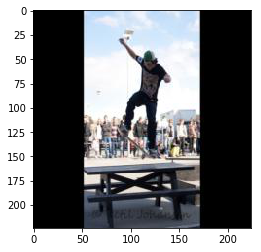

In [30]:
#Load test images
images_test = glob.glob("data/images_test/*.jpg")
images_test_sort = sorted(images_test)

img=mpimg.imread(images_train_sort[0])
imgplot = plt.imshow(img)
plt.show()

In [31]:
# Load tags and order
tags_test = glob.glob("data/tags_test/*.txt")
tags_test_sort = sorted(tags_test)

all_tags_test = list()
for item in tags_test_sort:
    with open(item) as f:
        tags_test = f.read()
        all_tags_test.append(tags_test)

In [32]:
tags_test = list()
for element in all_tags_test:
    helper = element.replace("\n", " ")
    helper = helper.replace(":", " ")
    tags_test.append(helper)
    
clean_tags_test = list()
for element in tags_test:
    helper = element.split(" ")
    helper = list(filter(None, helper))
    clean_tags_test.append(helper) 
    
category_tags_test = list()
for el in clean_tags_test:
    category_tags_test.append(el[1::2])

In [33]:
#Load test feautres
features_test = pd.read_csv('data/features_test/features_resnet1000_test.csv')